In [1]:
library(lubridate)


Attaching package: ‘lubridate’

The following object is masked from ‘package:base’:

    date



In [2]:
DATA_DIR = '../data/clean/'

In [88]:
files <- list.files(DATA_DIR)
files[1:5]

[1] "alpineMeadowsWA.csv_2007.csv" "alpineMeadowsWA.csv_2008.csv"
[3] "alpineMeadowsWA.csv_2009.csv" "alpineMeadowsWA.csv_2010.csv"
[5] "alpineMeadowsWA.csv_2011.csv"

In [29]:
daily <- read.csv(paste(DATA_DIR, files[60], sep=''))
head(daily)

STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,PRCP,TAVG,TMAX,TMIN,YEAR
USS0005P04S,"ELK CABIN, NM US",35.7,-105.81,2502.4,2016-01-01,0.0,-6.5,-1.9,-11.4,2016
USS0005P04S,"ELK CABIN, NM US",35.7,-105.81,2502.4,2016-01-02,0.0,-5.7,5.7,-11.9,2016
USS0005P04S,"ELK CABIN, NM US",35.7,-105.81,2502.4,2016-01-03,0.0,-3.6,6.3,-10.2,2016
USS0005P04S,"ELK CABIN, NM US",35.7,-105.81,2502.4,2016-01-04,2.5,-1.7,5.0,-8.6,2016
USS0005P04S,"ELK CABIN, NM US",35.7,-105.81,2502.4,2016-01-05,2.5,-2.3,0.9,-5.4,2016
USS0005P04S,"ELK CABIN, NM US",35.7,-105.81,2502.4,2016-01-06,17.8,-2.3,0.9,-5.4,2016


In [30]:
daily$DATE <- as.Date(daily$DATE, format='%Y-%m-%d')
daily <- daily[complete.cases(daily), ]
daily <- daily[order(daily$DATE), ]
head(daily)

STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,PRCP,TAVG,TMAX,TMIN,YEAR
USS0005P04S,"ELK CABIN, NM US",35.7,-105.81,2502.4,2016-01-01,0.0,-6.5,-1.9,-11.4,2016
USS0005P04S,"ELK CABIN, NM US",35.7,-105.81,2502.4,2016-01-02,0.0,-5.7,5.7,-11.9,2016
USS0005P04S,"ELK CABIN, NM US",35.7,-105.81,2502.4,2016-01-03,0.0,-3.6,6.3,-10.2,2016
USS0005P04S,"ELK CABIN, NM US",35.7,-105.81,2502.4,2016-01-04,2.5,-1.7,5.0,-8.6,2016
USS0005P04S,"ELK CABIN, NM US",35.7,-105.81,2502.4,2016-01-05,2.5,-2.3,0.9,-5.4,2016
USS0005P04S,"ELK CABIN, NM US",35.7,-105.81,2502.4,2016-01-06,17.8,-2.3,0.9,-5.4,2016


In [31]:
daily$MONTH <- as.numeric(format(daily$DATE, '%m'))
daily$YDAY <- yday(daily$DATE)
#daily$YEAR_MONTH <- paste(daily$YEAR, daily$MONTH, sep='_')
head(daily)

STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,PRCP,TAVG,TMAX,TMIN,YEAR,MONTH,YDAY
USS0005P04S,"ELK CABIN, NM US",35.7,-105.81,2502.4,2016-01-01,0.0,-6.5,-1.9,-11.4,2016,1,1
USS0005P04S,"ELK CABIN, NM US",35.7,-105.81,2502.4,2016-01-02,0.0,-5.7,5.7,-11.9,2016,1,2
USS0005P04S,"ELK CABIN, NM US",35.7,-105.81,2502.4,2016-01-03,0.0,-3.6,6.3,-10.2,2016,1,3
USS0005P04S,"ELK CABIN, NM US",35.7,-105.81,2502.4,2016-01-04,2.5,-1.7,5.0,-8.6,2016,1,4
USS0005P04S,"ELK CABIN, NM US",35.7,-105.81,2502.4,2016-01-05,2.5,-2.3,0.9,-5.4,2016,1,5
USS0005P04S,"ELK CABIN, NM US",35.7,-105.81,2502.4,2016-01-06,17.8,-2.3,0.9,-5.4,2016,1,6


In [33]:
monthly.means <- tapply(daily$TAVG, daily$MONTH, mean)
daily$monthly.means <- monthly.means[daily$MONTH]
head(daily)

STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,PRCP,TAVG,TMAX,TMIN,YEAR,MONTH,YDAY,monthly.means
USS0005P04S,"ELK CABIN, NM US",35.7,-105.81,2502.4,2016-01-01,0.0,-6.5,-1.9,-11.4,2016,1,1,-2.822581
USS0005P04S,"ELK CABIN, NM US",35.7,-105.81,2502.4,2016-01-02,0.0,-5.7,5.7,-11.9,2016,1,2,-2.822581
USS0005P04S,"ELK CABIN, NM US",35.7,-105.81,2502.4,2016-01-03,0.0,-3.6,6.3,-10.2,2016,1,3,-2.822581
USS0005P04S,"ELK CABIN, NM US",35.7,-105.81,2502.4,2016-01-04,2.5,-1.7,5.0,-8.6,2016,1,4,-2.822581
USS0005P04S,"ELK CABIN, NM US",35.7,-105.81,2502.4,2016-01-05,2.5,-2.3,0.9,-5.4,2016,1,5,-2.822581
USS0005P04S,"ELK CABIN, NM US",35.7,-105.81,2502.4,2016-01-06,17.8,-2.3,0.9,-5.4,2016,1,6,-2.822581


In [34]:
#daily$prev.monthly.means <- c(
#    rep(NA, 2*365), daily$monthly.means[1:(dim(daily)[1] - 2*365)])

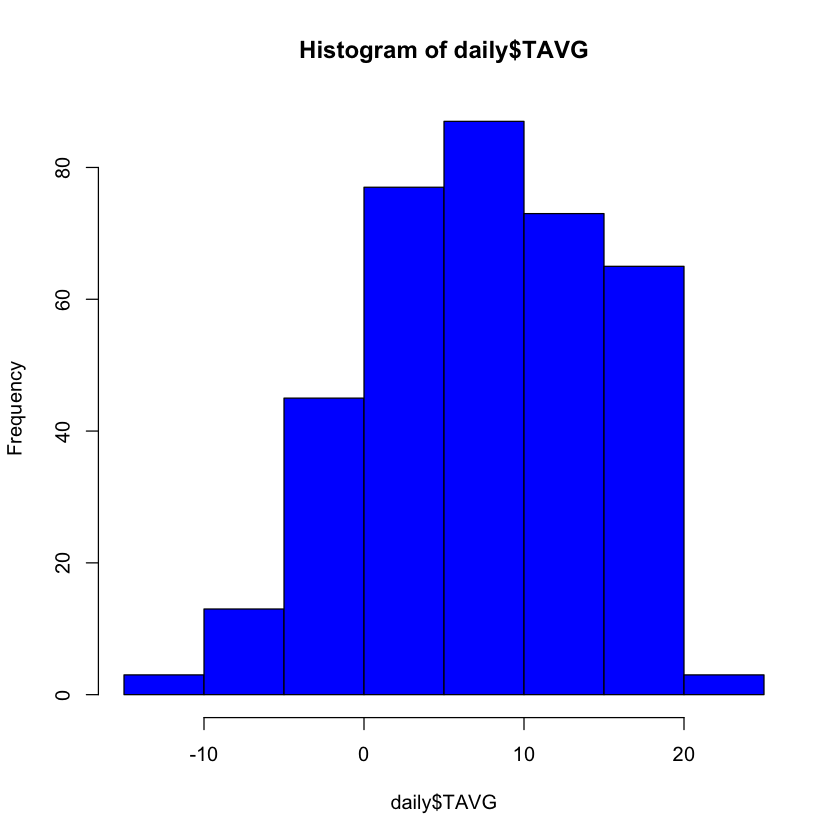

In [52]:
hist(daily$TAVG, col=4)

In [35]:
DAYS <- 365.25
mod1 <- lm(TAVG ~ monthly.means 
             + YDAY
             + I(YDAY^2)
             + sin(pi*(YDAY - DAYS/4 - 30) / (DAYS/2)), 
           data=daily)
mod1 <- step(mod1, trace=0)
summary(mod1)


Call:
lm(formula = TAVG ~ monthly.means + YDAY + I(YDAY^2) + sin(pi * 
    (YDAY - DAYS/4 - 30)/(DAYS/2)), data = daily)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.0465  -1.5558   0.2273   1.9671   6.6240 

Coefficients:
                                          Estimate Std. Error t value Pr(>|t|)
(Intercept)                              7.189e-02  1.120e+00   0.064   0.9489
monthly.means                            6.861e-01  9.190e-02   7.465  6.3e-13
YDAY                                     3.538e-02  1.515e-02   2.335   0.0201
I(YDAY^2)                               -9.434e-05  3.814e-05  -2.474   0.0138
sin(pi * (YDAY - DAYS/4 - 30)/(DAYS/2))  1.766e+00  8.351e-01   2.114   0.0352
                                           
(Intercept)                                
monthly.means                           ***
YDAY                                    *  
I(YDAY^2)                               *  
sin(pi * (YDAY - DAYS/4 - 30)/(DAYS/2)) *  
---
Signif. codes:  0

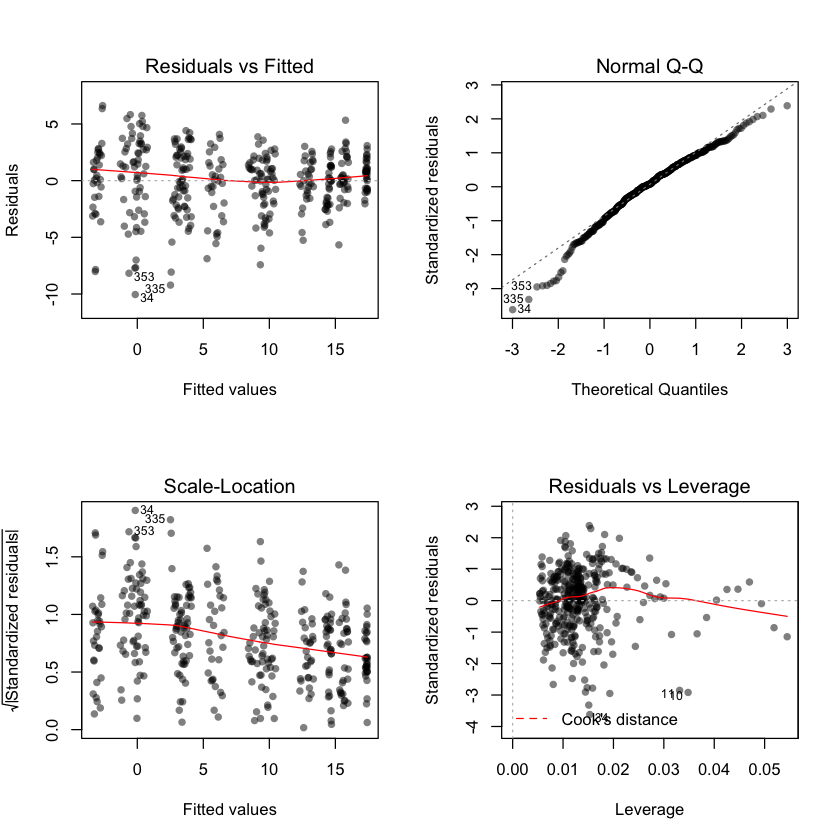

In [36]:
par(mfrow=c(2, 2))
plot(mod1, pch=16, col=rgb(0, 0, 0, 0.5))

In [37]:
preds <- predict(mod1)

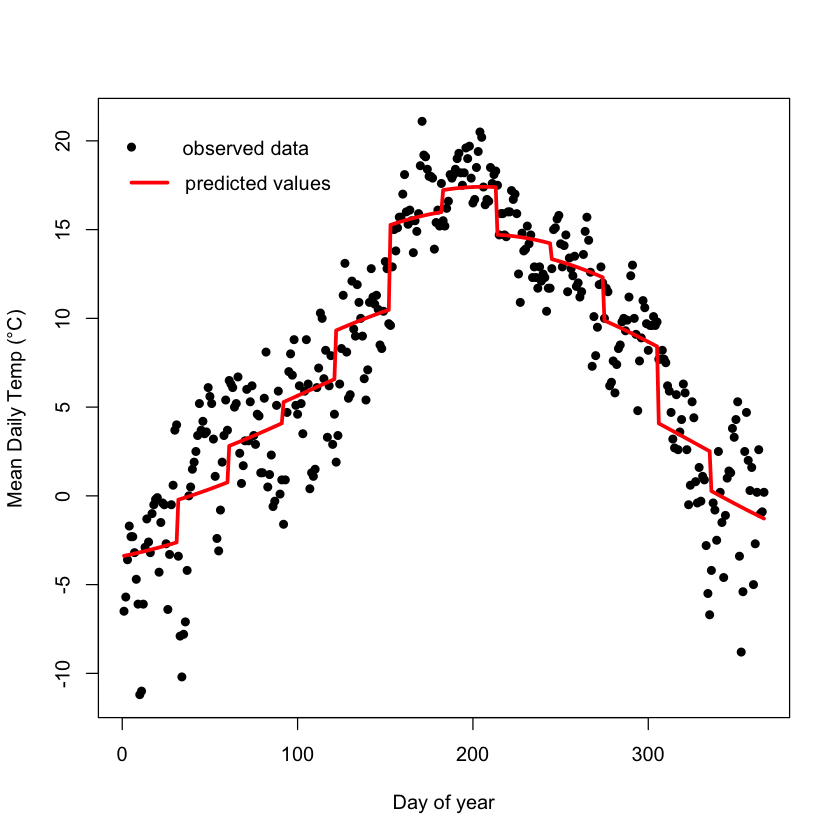

In [38]:
plot(daily$TAVG, pch=16, xlab='Day of year', ylab='Mean Daily Temp (°C)')
lines(preds, col=2, lwd=3)
legend(-5, 21, pch=16, legend='      observed data', bty='n')
legend(-5, 19, lty=1, lwd=3, col=2, legend='predicted values', bty='n')

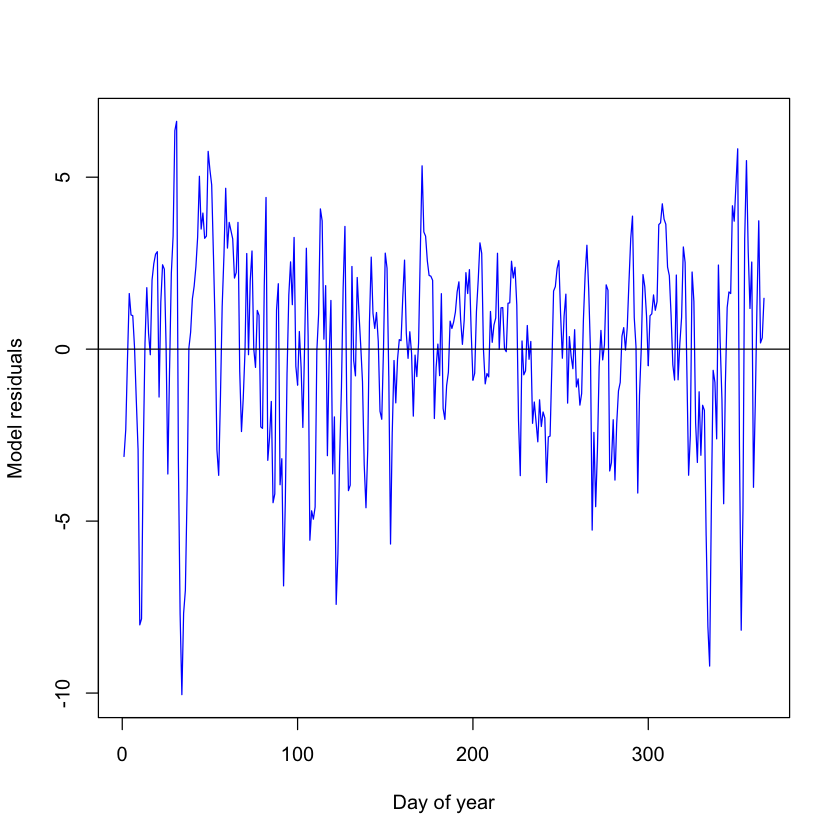

In [39]:
plot(mod1$resid ~ daily$YDAY, 
     type='l', 
     col=4, 
     xlab='Day of year', 
     ylab='Model residuals')
abline(h=0)

Best AR(p): p = 2

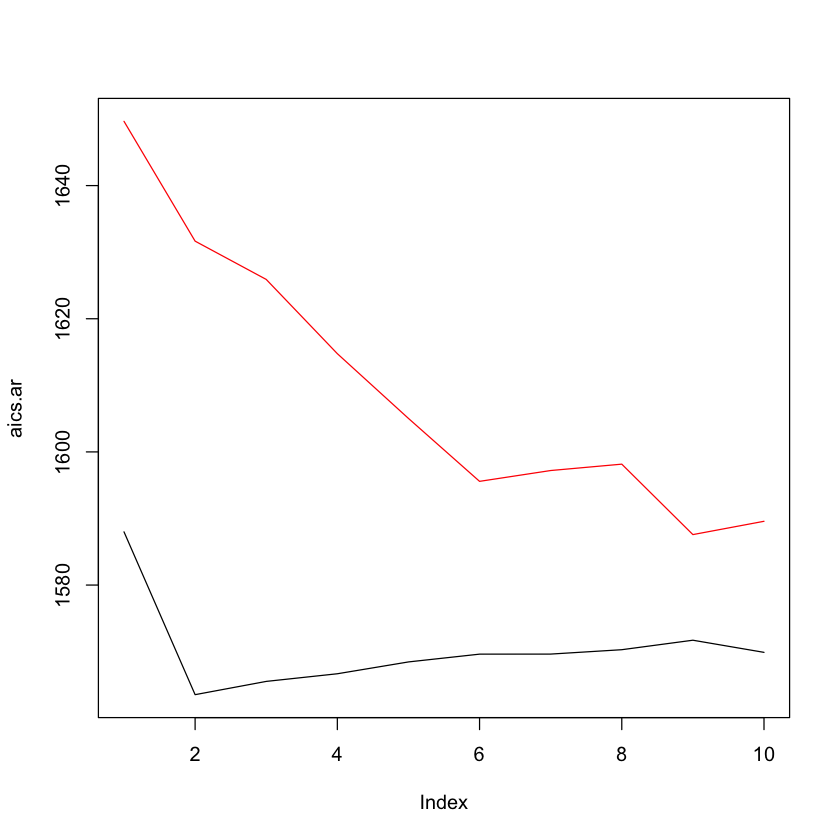

In [40]:
aics.ar <- numeric(10)
aics.ari <- numeric(10)
for (ar in 1:10) {
  ar.mod <- arima(resid(mod1), order=c(ar, 0, 0))
  ari.mod <- arima(resid(mod1), order=c(ar, 1, 0))
  aics.ar[ar] <- ar.mod$aic
  aics.ari[ar] <- ari.mod$aic
}

cat('Best AR(p): p =', which(aics.ar == min(aics.ar)))
plot(aics.ar, type='l', ylim=range(c(aics.ar, aics.ari)))
lines(aics.ari, col=2)

In [41]:
ar3.mod <- arima(resid(mod1), order=c(3, 0, 0))
ar3.mod


Call:
arima(x = resid(mod1), order = c(3, 0, 0))

Coefficients:
         ar1      ar2     ar3  intercept
      0.8288  -0.2677  0.0046    -0.0025
s.e.  0.0522   0.0664  0.0522     0.2431

sigma^2 estimated as 4.097:  log likelihood = -777.77,  aic = 1565.53

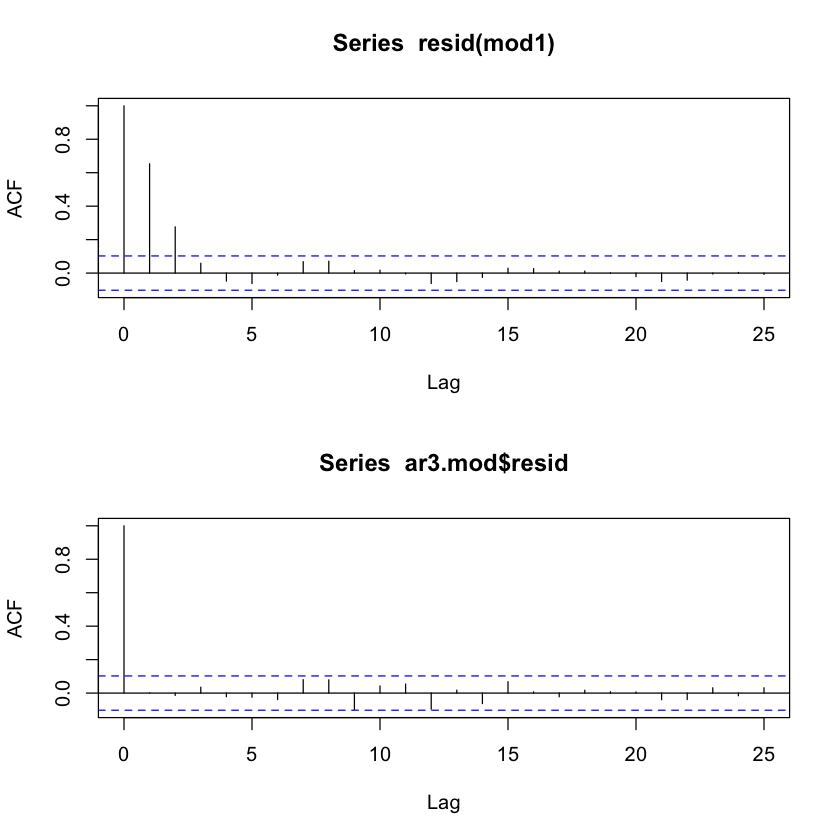

In [42]:
par(mfrow=c(2, 1))
acf(resid(mod1))
acf(ar3.mod$resid)

In [43]:
arima.error <- ar3.mod$resid
mean(arima.error) # should be ~ 0

[1] 0.004020472

In [44]:
sd(arima.error)

[1] 2.026898

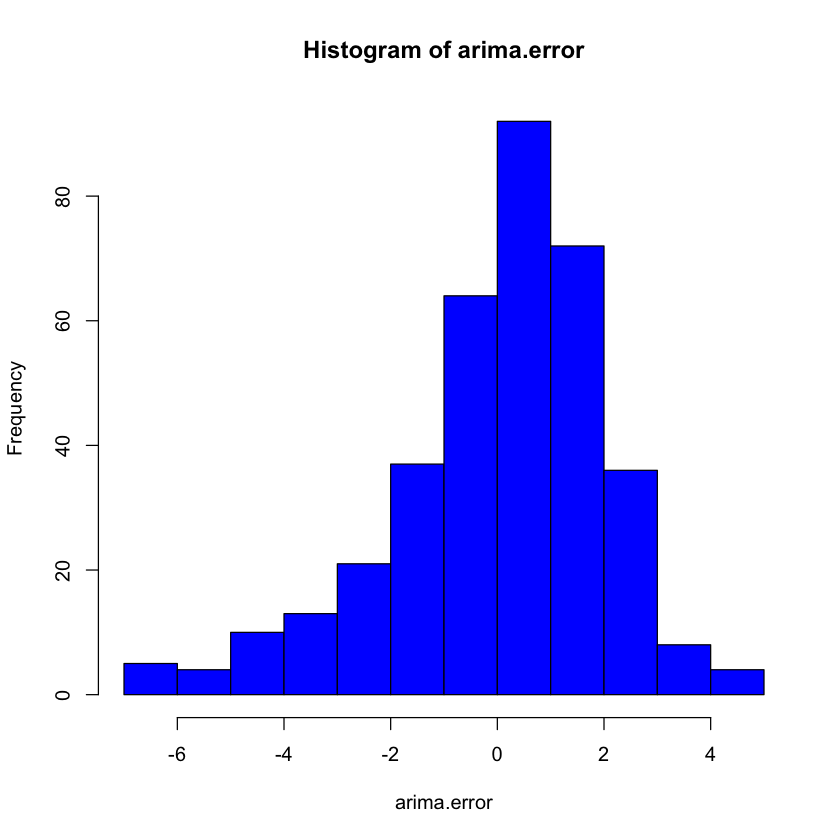

In [45]:
hist(arima.error, col=4)

In [46]:
n <- length(arima.error)
last3 <- arima.error[(n-2):n]
betas <- ar3.mod$coef
betas

ar1          ar2          ar3    intercept 
 0.828759682 -0.267724347  0.004597574 -0.002509266

In [47]:
pseudo.arima.error <- rnorm(n + 3, mean(arima.error), sd(arima.error))
pseudo.resids <- numeric(n + 3)
# use end of year to seed beginning
pseudo.resids[1:3] <- arima.error[(n-2):n] 
for (t in 4:(n + 3)) {
  pseudo.resids[t] <- (betas['intercept'] 
                       + betas['ar1']*pseudo.resids[t - 1]
                       + betas['ar2']*pseudo.resids[t - 2]
                       + betas['ar3']*pseudo.resids[t - 3]
                       + pseudo.arima.error[t])
}

pseudo.resids <- pseudo.resids[-c(1:3)]
length(preds)
length(pseudo.resids)

[1] 366

[1] 366

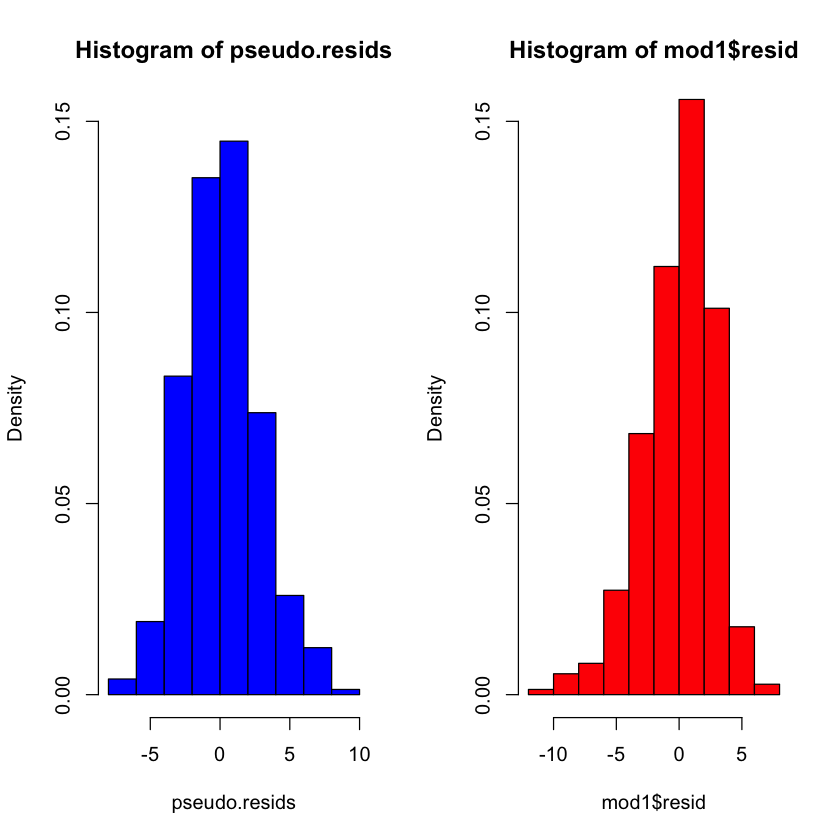

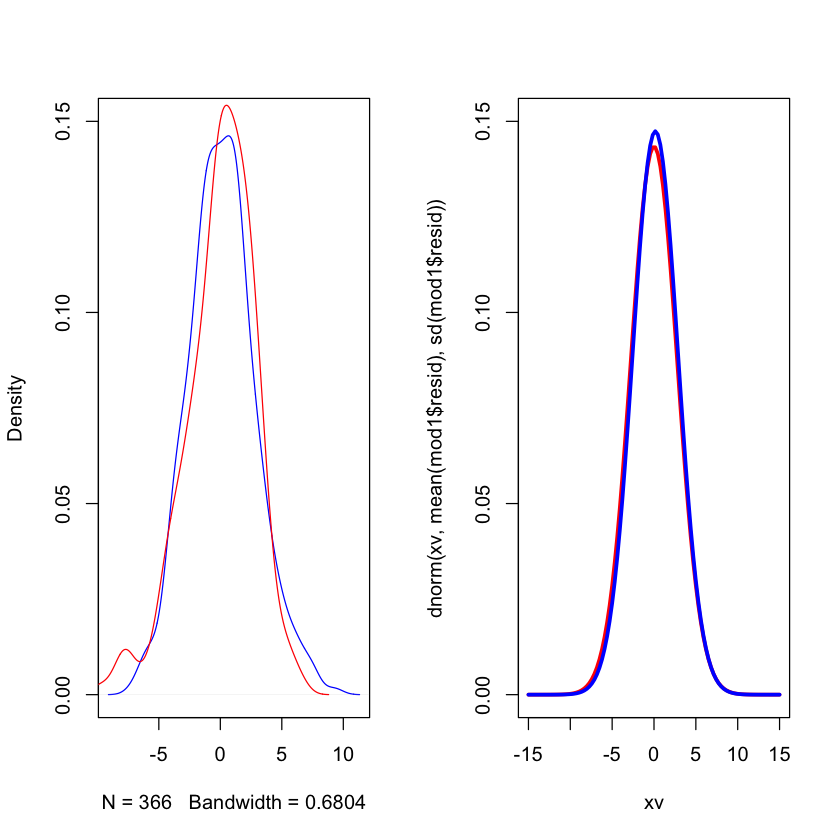

In [48]:
par(mfrow=c(1, 2))
xv <- seq(-15, 15, length=100)
hist(pseudo.resids, col=4, freq=F, ylim=c(0, 0.15))
hist(mod1$resid, col=2, freq=F, ylim=c(0, 0.15))
plot(density(pseudo.resids), col=4, ylim=c(0, 0.15), main='')
lines(density(mod1$resid), col=2)

plot(xv, 
     dnorm(xv, mean(mod1$resid), sd(mod1$resid)), 
     col=2, 
     type='l', 
     lwd=3, 
     ylim=c(0, 0.15))
lines(xv, dnorm(xv, mean(pseudo.resids), sd(pseudo.resids)), col=4, lwd=3)


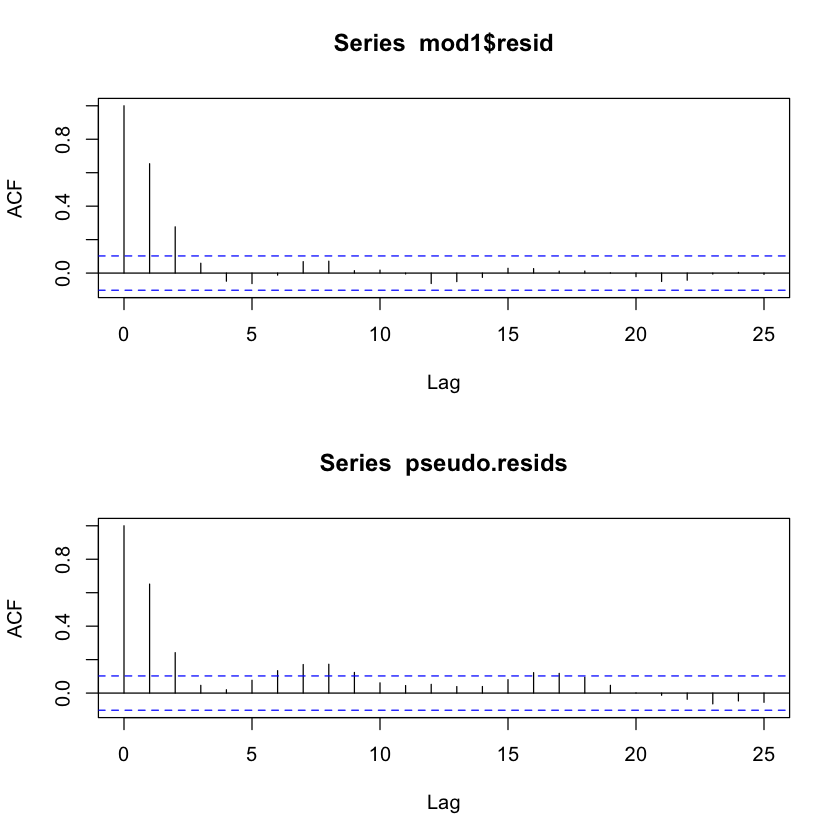

In [49]:
par(mfrow=c(2, 1))
acf(mod1$resid)
acf(pseudo.resids)

In [50]:
pseudo.data <- preds + pseudo.resids

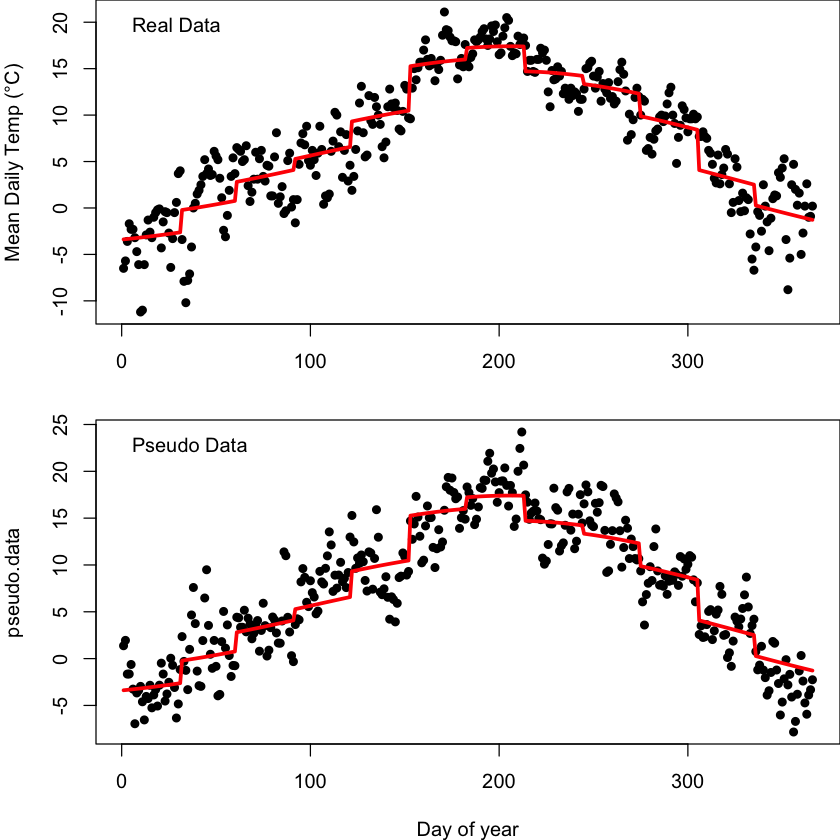

In [51]:
par(mfrow=c(2, 1))
par(mar=c(4, 4, 0, 0))
plot(daily$TAVG, 
     pch=16,  
     ylab='Mean Daily Temp (°C)',
     xlab='')
lines(preds, col=2, lwd=3)
legend('topleft', 'Real Data', bty='n')
plot(pseudo.data, xlab='Day of year', pch=16)
lines(preds, col=2, lwd=3)
legend('topleft', 'Pseudo Data', bty='n')

In [53]:
prep.data <- function(path) {
  daily <- read.csv(path)
  daily$DATE <- as.Date(daily$DATE, format='%Y-%m-%d')
  daily <- daily[complete.cases(daily), ]
  daily <- daily[order(daily$DATE), ]
  daily$MONTH <- as.numeric(format(daily$DATE, '%m'))
  daily$YDAY <- yday(daily$DATE)
  monthly.means <- tapply(daily$TAVG, daily$MONTH, mean)
  daily$monthly.means <- monthly.means[daily$MONTH]
  daily
}

In [92]:
predict.daily <- function(daily, statistic) {
  DAYS <- 365.25
  mod <- lm(daily[, statistic] ~ monthly.means 
               + YDAY
               #+ I(YDAY^2)
               + sin(pi*(YDAY - DAYS/4 - 30) / (DAYS/2)), 
             data=daily)
  #mod <- step(mod, trace=0)
  mod
}

In [93]:
determine.best.coefs <- function() {
  DATA_DIR = '../data/clean/'
  STATISTIC <- 'TAVG'
  files <- list.files(DATA_DIR)
  if (STATISTIC == 'TAVG') {
    files <- files[-which(grepl('mountRushmoreSD', files))]
    files <- files[-which(grepl('rosaliaWA', files))]
  }
  coef.matrix <- matrix(0, nrow=5, ncol=length(files))
  rownames(coef.matrix) <- c(
      '(Intercept)', 'monthly.means', 'YDAY', 
      'I(YDAY^2)', 'sin(pi * (YDAY - DAYS/4 - 30)/(DAYS/2))')
  for (i in 1:length(files)) {
    file <- files[i]
    path <- paste(DATA_DIR, file, sep='')
    daily <- prep.data(path)
    if (sum(!is.na(daily[, STATISTIC])) < 200) {
      cat(sprintf('Too few data points in %s. Omit from analysis.', file))
    }
    mod <- predict.daily(daily, STATISTIC)
    mod <- step(mod, trace=0)
    coeffs <- names(coef(mod))
    for (c in coeffs) {
      coef.matrix[c, i] <- 1
    }
  }
  rowSums(coef.matrix)
}

mod <- determine.best.coefs()

In [94]:
mod

(Intercept)                           monthly.means 
                                    230                                     229 
                                   YDAY                               I(YDAY^2) 
                                    127                                       0 
sin(pi * (YDAY - DAYS/4 - 30)/(DAYS/2)) 
                                    168

Keep coeff if appearing in at least half of the models.
(I(YDAY^2) dropped)

In [98]:
find.best.ar.number <- function() {
  DATA_DIR = '../data/clean/'
  STATISTIC <- 'TAVG'
  files <- list.files(DATA_DIR)
  if (STATISTIC == 'TAVG') {
    files <- files[-which(grepl('mountRushmoreSD', files))]
    files <- files[-which(grepl('rosaliaWA', files))]
  }  
  best.ar.n <- c()
  for (file in files) {
    path <- paste(DATA_DIR, file, sep='')
    daily <- prep.data(path)
    if (sum(!is.na(daily[, STATISTIC])) < 200) {
      cat(sprintf('Too few data points in %s. Omit from analysis.', file))
    }
    mod <- predict.daily(daily, STATISTIC)
    fitted <- predict(mod)
    aics.ar <- numeric(10)
    for (ar in 1:10) {
      ar.mod <- arima(resid(mod1), order=c(ar, 0, 0))
      aics.ar[ar] <- ar.mod$aic
    }
    best.ar.n <- c(best.ar.n, which(aics.ar == min(aics.ar)))
  }
  best.ar.n
}

In [102]:
best.ar.n <- find.best.ar.number()
best.ar.n

[1] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [38] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [75] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
[112] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
[149] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
[186] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
[223] 2 2 2 2 2 2 2 2

In [143]:
compile.arima.coefs <- function() {
  DATA_DIR = '../data/clean/'
  STATISTIC <- 'TAVG'
  files <- list.files(DATA_DIR)
  if (STATISTIC == 'TAVG') {
    files <- files[-which(grepl('mountRushmoreSD', files))]
    files <- files[-which(grepl('rosaliaWA', files))]
    files <- files[-which(grepl('hansenSawmillWY', files))]
  }  
  out <- data.frame(
      intercept=c(), ar1=c(), ar2=c(), lat=c(), lon=c(), elev=c(), 
      precip=c(), location=c())
  for (file in files) {
    path <- paste(DATA_DIR, file, sep='')
    daily <- prep.data(path)
    if (sum(!is.na(daily[, STATISTIC])) < 200) {
      cat(sprintf('Too few data points in %s. Omit from analysis.', file))
    }
    mod <- predict.daily(daily, STATISTIC)
    fitted <- predict(mod)
    ar2.mod <- arima(resid(mod), order=c(2, 0, 0))  
    betas <- ar2.mod$coef
    row <- data.frame(
      intercept=betas['intercept'], ar1=betas['ar1'], ar2=betas['ar2'],
      lat=daily[1, 'LATITUDE'], lon=daily[1, 'LONGITUDE'], 
      elev=daily[1, 'ELEVATION'], precip=sum(daily$PRCP), 
      location=paste(daily[1, 'NAME'], daily[1, 'YEAR'], sep=''))
    out <- rbind(out, row)
  }
  rownames(out) <- out$location
  out <- out[, -which(names(out) == 'location')]
}    
    
out <- compile.arima.coefs()

In [144]:
head(out)

,intercept,ar1,ar2,lat,lon,elev,precip
"ALPINE MEADOWS, WA US2007",-0.003010902,0.8637452,-0.3004056,47.78,-121.7,1066.8,4149.9
"ALPINE MEADOWS, WA US2008",0.002759818,0.9253940,-0.2119761,47.78,-121.7,1066.8,3722.6
"ALPINE MEADOWS, WA US2009",0.008512020,0.9174250,-0.2927936,47.78,-121.7,1066.8,4045.5
"ALPINE MEADOWS, WA US2010",-0.006927623,0.9515824,-0.3358841,47.78,-121.7,1066.8,4146.7
"ALPINE MEADOWS, WA US2011",-0.021614576,0.8131074,-0.2691512,47.78,-121.7,1066.8,4627.1
"ALPINE MEADOWS, WA US2012",-0.002930583,0.8762194,-0.3039523,47.78,-121.7,1066.8,4814.9


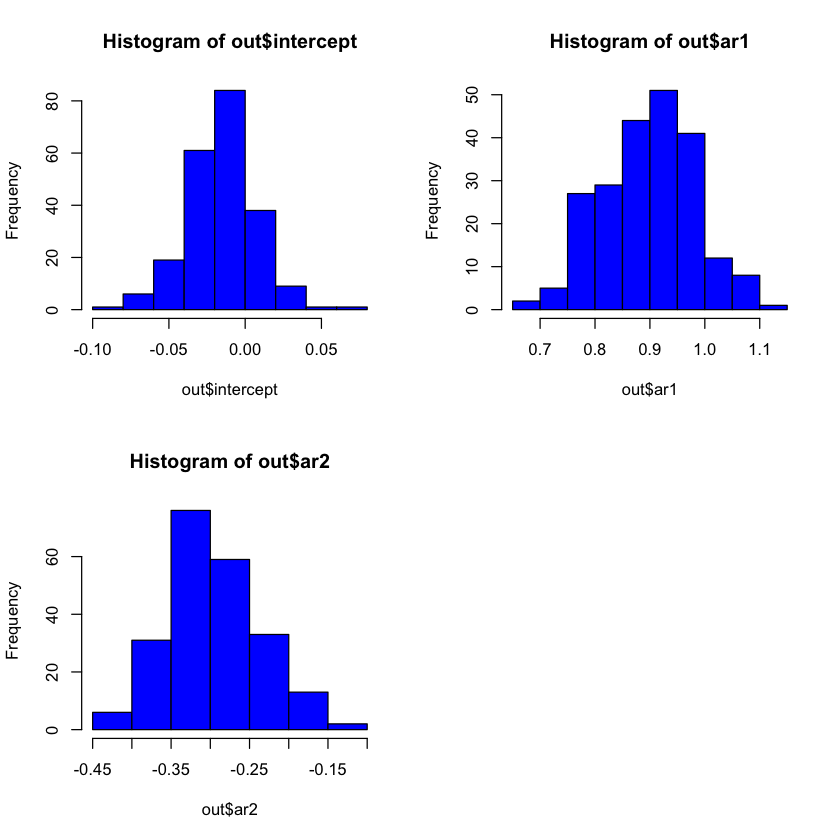

In [145]:
par(mfrow=c(2, 2))
hist(out$intercept, col=4)
hist(out$ar1, col=4)
hist(out$ar2, col=4)

In [147]:
predict.ar1.mod <- lm(ar1 ~ (lat + lon + elev + precip)^2, data=out)
predict.ar1.mod <- step(predict.ar1.mod, trace=0)
summary(predict.ar1.mod)


Call:
lm(formula = ar1 ~ lat + lon + elev + precip + lat:lon + lat:elev + 
    lat:precip, data = out)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.197858 -0.049843  0.002963  0.045483  0.179535 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -3.823e+00  1.079e+00  -3.543 0.000487 ***
lat          9.018e-02  2.371e-02   3.803 0.000187 ***
lon         -3.304e-02  7.921e-03  -4.171 4.42e-05 ***
elev         3.932e-04  1.187e-04   3.312 0.001089 ** 
precip       2.224e-04  1.498e-04   1.485 0.139108    
lat:lon      5.980e-04  1.712e-04   3.492 0.000584 ***
lat:elev    -9.242e-06  2.677e-06  -3.452 0.000672 ***
lat:precip  -4.975e-06  3.200e-06  -1.555 0.121439    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.07006 on 212 degrees of freedom
Multiple R-squared:  0.3489,	Adjusted R-squared:  0.3274 
F-statistic: 16.23 on 7 and 212 DF,  p-value: < 2.2e-16


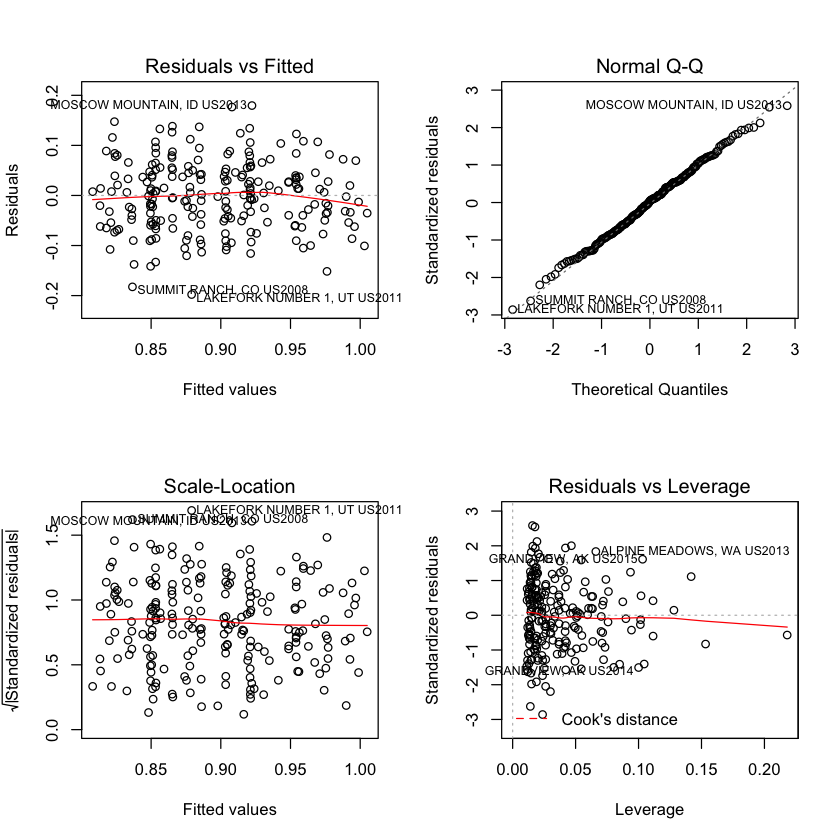

In [148]:
par(mfrow=c(2, 2))
plot(predict.ar1.mod)

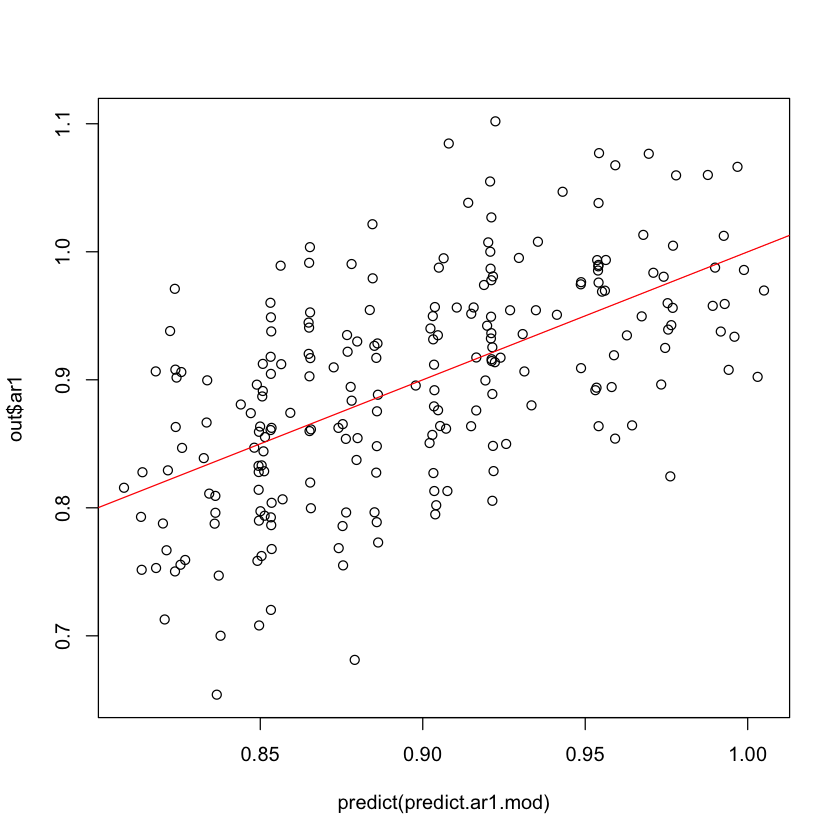

In [149]:
plot(out$ar1 ~ predict(predict.ar1.mod))
abline(0, 1, col=2)

In [150]:
predict.ar2.mod <- lm(ar2 ~ (lat + lon + elev + precip)^2, data=out)
predict.ar2.mod <- step(predict.ar2.mod, trace=0)
summary(predict.ar2.mod)


Call:
lm(formula = ar2 ~ lat + lon + elev + precip + lat:lon + lat:elev + 
    lat:precip, data = out)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.122128 -0.031454 -0.006294  0.030078  0.140141 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.876e+00  8.090e-01   3.555 0.000466 ***
lat         -6.082e-02  1.777e-02  -3.422 0.000746 ***
lon          2.148e-02  5.938e-03   3.617 0.000372 ***
elev        -2.464e-04  8.899e-05  -2.769 0.006113 ** 
precip      -2.807e-04  1.123e-04  -2.500 0.013184 *  
lat:lon     -3.986e-04  1.284e-04  -3.105 0.002165 ** 
lat:elev     5.245e-06  2.007e-06   2.613 0.009608 ** 
lat:precip   6.011e-06  2.398e-06   2.506 0.012954 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.05252 on 212 degrees of freedom
Multiple R-squared:  0.2136,	Adjusted R-squared:  0.1876 
F-statistic: 8.226 on 7 and 212 DF,  p-value: 7.236e-09


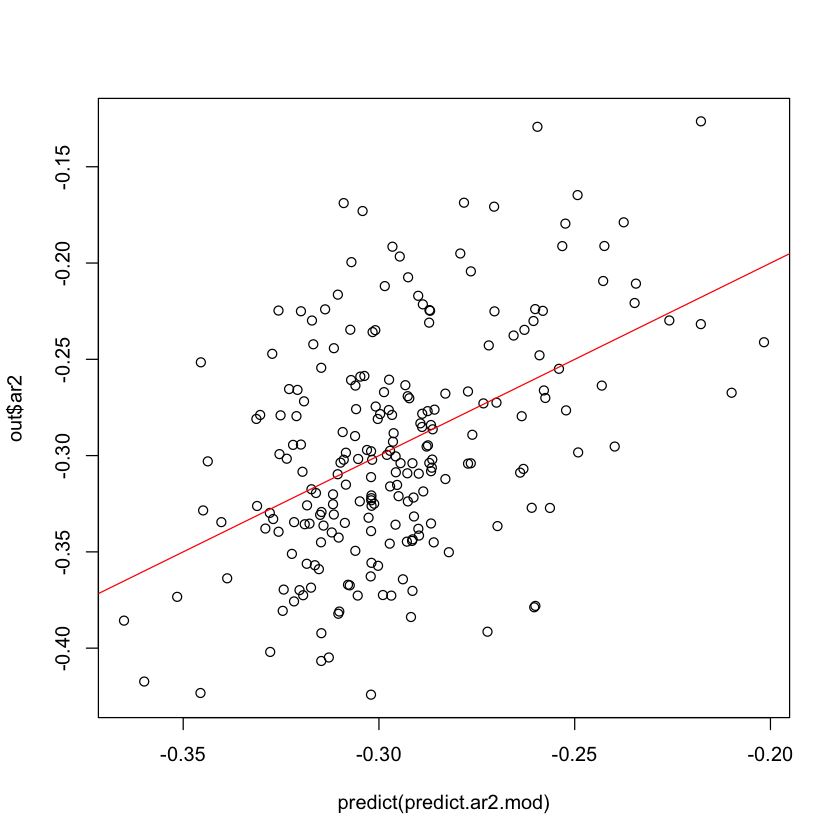

In [151]:
plot(out$ar2 ~ predict(predict.ar2.mod))
abline(0, 1, col=2)